# Support Vector Machine (SVM) - Model Training
## Forest Cover Type Dataset

This notebook trains a Linear SVM classifier using LinearSVC for efficient large-scale training.

### Key Features:
- LinearSVC for efficient training on large datasets
- Optimized for primal/dual optimization
- Comprehensive evaluation metrics
- Confusion matrix visualization

## 1. Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.kernel_approximation import Nystroem
import joblib
import os
import time

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

print("Libraries imported successfully")

Libraries imported successfully


## 2. Configuration

In [2]:
print("=" * 80)
print("SVM TRAINING (Linear SVM)")
print("=" * 80)

SVM TRAINING (Linear SVM)


## 3. Load Processed Data

In [3]:
print("\n[1/5] Loading Processed Data...")

base_dir = os.path.abspath('../..')
data_path = os.path.join(base_dir, 'svm_implementation', 'data', 'svm_data.npz')

if not os.path.exists(data_path):
    print(f"Error: {data_path} not found!")
    raise FileNotFoundError("Please run the preprocessing notebook first.")

data = np.load(data_path)
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

print(f"✓ Data loaded successfully")
print(f"  - Training samples: {X_train.shape[0]:,}")
print(f"  - Test samples: {X_test.shape[0]:,}")
print(f"  - Features: {X_train.shape[1]}")
print(f"  - Classes: {len(np.unique(y_train))}")


[1/5] Loading Processed Data...


✓ Data loaded successfully
  - Training samples: 464,809
  - Test samples: 116,203
  - Features: 54
  - Classes: 7


## 4. Training Strategy

### SVM Training Options:
For ~580k samples:
1. **LinearSVC**: Fast baseline, good for primal/dual optimization
2. **SGDClassifier with hinge loss**: Alternative for very large datasets
3. **Kernel Approximation + SGD**: For non-linearity if needed

We use **LinearSVC** as it's optimized for medium-to-large datasets (100k-1M) and handles 54 dimensions efficiently.

## 5. Train Linear SVM

In [4]:
print("\n[2/5] Training Linear SVM (LinearSVC)...")
print("Parameters:")
print("  - dual=False (primal optimization for n_samples > n_features)")
print("  - max_iter=2000")
print("  - C=1.0 (regularization parameter)")

start_time = time.time()

clf = LinearSVC(
    dual=False,
    random_state=42,
    max_iter=2000,
    C=1.0
)

clf.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

print(f"✓ Training complete in {training_time:.2f} seconds")
print(f"  - Iterations: {clf.n_iter_}")


[2/5] Training Linear SVM (LinearSVC)...
Parameters:
  - dual=False (primal optimization for n_samples > n_features)
  - max_iter=2000
  - C=1.0 (regularization parameter)


✓ Training complete in 66.10 seconds
  - Iterations: 49


## 6. Make Predictions

In [5]:
print("\n[3/5] Generating predictions on test set...")
y_pred = clf.predict(X_test)
print("✓ Predictions generated")


[3/5] Generating predictions on test set...
✓ Predictions generated


## 7. Evaluate Model Performance

In [6]:
acc = accuracy_score(y_test, y_pred)

print("\n" + "=" * 80)
print(f"★ TEST ACCURACY: {acc*100:.2f}%")
print("=" * 80)


★ TEST ACCURACY: 71.14%


## 8. Detailed Classification Report

In [7]:
print("\n[4/5] Detailed Classification Report:")
print("=" * 80)
print(classification_report(y_test, y_pred, digits=4))


[4/5] Detailed Classification Report:
              precision    recall  f1-score   support

           1     0.7070    0.6825    0.6945     42368
           2     0.7350    0.7966    0.7646     56661
           3     0.6105    0.8663    0.7162      7151
           4     0.6201    0.2022    0.3049       549
           5     0.5581    0.0126    0.0247      1899
           6     0.4320    0.0576    0.1016      3473
           7     0.6819    0.5090    0.5829      4102

    accuracy                         0.7114    116203
   macro avg     0.6207    0.4467    0.4556    116203
weighted avg     0.7028    0.7114    0.6956    116203



## 9. Per-Class Performance Analysis

In [8]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

class_names = [
    'Spruce/Fir',
    'Lodgepole Pine',
    'Ponderosa Pine',
    'Cottonwood/Willow',
    'Aspen',
    'Douglas-fir',
    'Krummholz'
]

print("\nPer-Class Performance:")
print("=" * 90)
print(f"{'Class':<5} {'Name':<20} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'Support':<10}")
print("=" * 90)

for i, name in enumerate(class_names):
    print(f"{i+1:<5} {name:<20} {precision[i]:<12.4f} {recall[i]:<12.4f} {f1[i]:<12.4f} {support[i]:<10}")

print("=" * 90)


Per-Class Performance:
Class Name                 Precision    Recall       F1-Score     Support   
1     Spruce/Fir           0.7070       0.6825       0.6945       42368     
2     Lodgepole Pine       0.7350       0.7966       0.7646       56661     
3     Ponderosa Pine       0.6105       0.8663       0.7162       7151      
4     Cottonwood/Willow    0.6201       0.2022       0.3049       549       
5     Aspen                0.5581       0.0126       0.0247       1899      
6     Douglas-fir          0.4320       0.0576       0.1016       3473      
7     Krummholz            0.6819       0.5090       0.5829       4102      


## 10. Confusion Matrix Visualization


[5/5] Creating confusion matrix visualization...


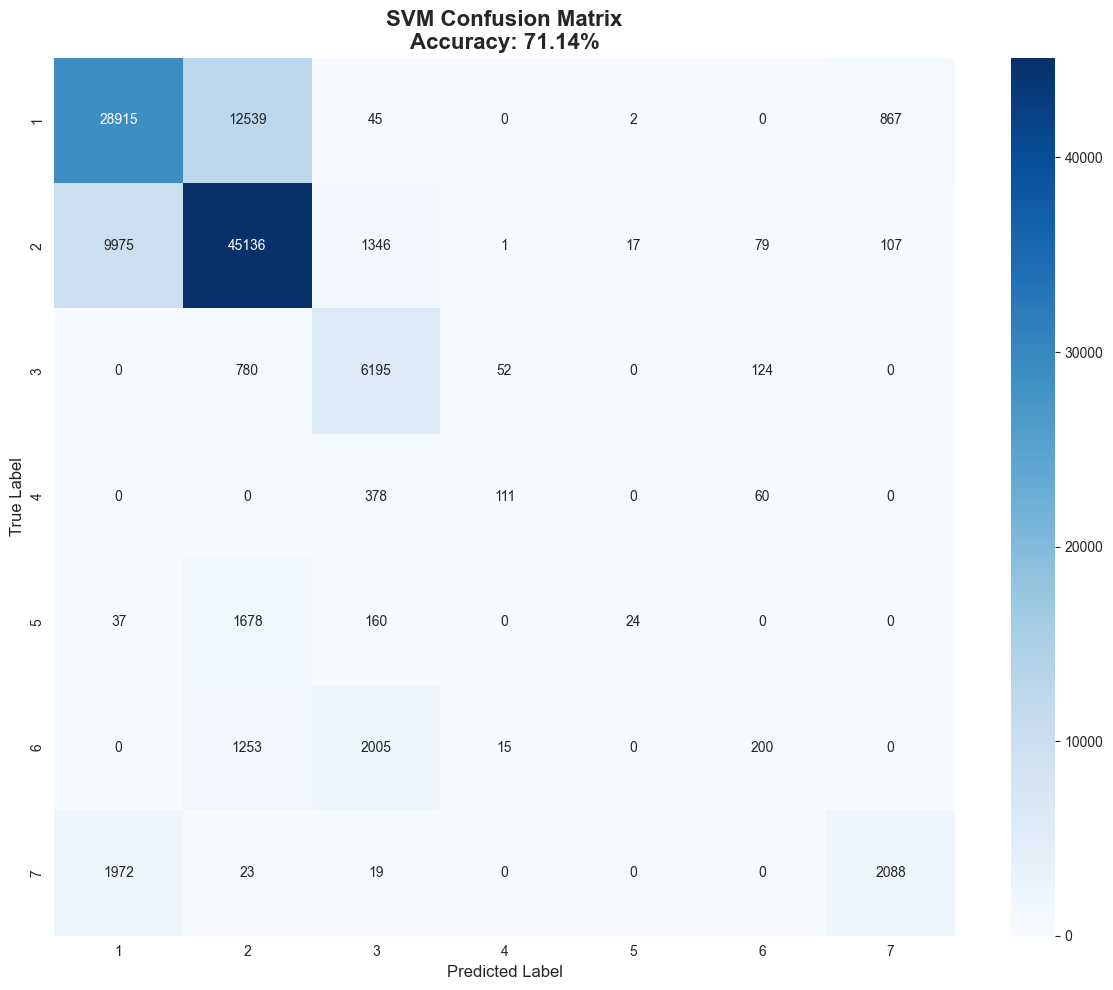

✓ Saved confusion matrix to: C:\PYTHON\AIT511 Course Project 2\archive\svm_confusion_matrix.png


In [9]:
print("\n[5/5] Creating confusion matrix visualization...")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=range(1, 8),
    yticklabels=range(1, 8)
)
plt.title(f'SVM Confusion Matrix\nAccuracy: {acc*100:.2f}%', 
          fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()

output_path = os.path.join(base_dir, 'svm_confusion_matrix.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved confusion matrix to: {output_path}")

## 11. Model Coefficients Analysis

Examine the learned weights to understand feature importance.

In [10]:
print("\nModel Coefficients Shape:")
print(f"  - Coefficients: {clf.coef_.shape}")
print(f"  - Intercepts: {clf.intercept_.shape}")
print(f"\nInterpretation: {clf.coef_.shape[0]} classifiers (one-vs-rest), {clf.coef_.shape[1]} features each")


Model Coefficients Shape:
  - Coefficients: (7, 54)
  - Intercepts: (7,)

Interpretation: 7 classifiers (one-vs-rest), 54 features each


## 12. Save Model

In [11]:
model_path = os.path.join(base_dir, 'svm_model.joblib')
joblib.dump(clf, model_path)
print(f"✓ Model saved to: {model_path}")

✓ Model saved to: C:\PYTHON\AIT511 Course Project 2\archive\svm_model.joblib


## 13. Summary

In [12]:
print("\n" + "=" * 80)
print("SVM TRAINING COMPLETE")
print("=" * 80)
print(f"✓ Model: Linear SVM (LinearSVC)")
print(f"✓ Training time: {training_time:.2f} seconds")
print(f"✓ Test accuracy: {acc*100:.2f}%")
print(f"✓ Training samples: {X_train.shape[0]:,}")
print(f"✓ Test samples: {X_test.shape[0]:,}")
print(f"✓ Features: {X_train.shape[1]}")
print(f"\nFiles saved:")
print(f"  - Model: {model_path}")
print(f"  - Confusion Matrix: {output_path}")


SVM TRAINING COMPLETE
✓ Model: Linear SVM (LinearSVC)
✓ Training time: 66.10 seconds
✓ Test accuracy: 71.14%
✓ Training samples: 464,809
✓ Test samples: 116,203
✓ Features: 54

Files saved:
  - Model: C:\PYTHON\AIT511 Course Project 2\archive\svm_model.joblib
  - Confusion Matrix: C:\PYTHON\AIT511 Course Project 2\archive\svm_confusion_matrix.png
